In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(r"/content/drive/MyDrive/Alzheimer's dataset.csv")

In [4]:
# Check for null values in each column
null_values = dataset.isnull().sum()

# Determine the data types of each column
data_types = dataset.dtypes
#print(data_types)

# Identify categorical and numerical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()

# Creating a summary table
null_summary = pd.DataFrame({
    "Column Name": dataset.columns,
    "Data Type": ["Categorical" if col in categorical_columns else "Numerical" for col in dataset.columns],
    "Null Values": null_values.values
})
print(null_summary)

# Imputing the 'SES' column with mode
# Mode can return multiple values; we take the first one
ses_mode = dataset['SES'].mode()[0]
dataset['SES'].fillna(ses_mode, inplace=True)

# Imputing the 'MMSE' column with median
mmse_median = dataset['MMSE'].median()
dataset['MMSE'].fillna(mmse_median, inplace=True)

# Verifying the imputation
imputation_check = dataset.isnull().sum()

# Printing the results
print(imputation_check)

cleaned = dataset

   Column Name    Data Type  Null Values
0   Subject ID  Categorical            0
1       MRI ID  Categorical            0
2        Group  Categorical            0
3        Visit    Numerical            0
4     MR Delay    Numerical            0
5          M/F  Categorical            0
6         Hand  Categorical            0
7          Age    Numerical            0
8         EDUC    Numerical            0
9          SES    Numerical           19
10        MMSE    Numerical            2
11         CDR    Numerical            0
12        eTIV    Numerical            0
13        nWBV    Numerical            0
14         ASF    Numerical            0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [13]:
#Analysing the dataset
print(cleaned.describe())
#converted is turned as demented
cleaned['Group'] = cleaned['Group'].replace(['Converted'], ['Demented'])
# Converting the catagorical values in numerical
cleaned['M/F'] = cleaned['M/F'].replace(['M','F'], [0,1])
cleaned['Group'] = cleaned['Group'].replace(['Nondemented', 'Demented'], [1,0])



            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.436997   
std      0.922843   635.485118    7.640957    2.876339    1.109307   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.351206    0.290885  1488.128686    0.729568    1.195461  
std      3.675329    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

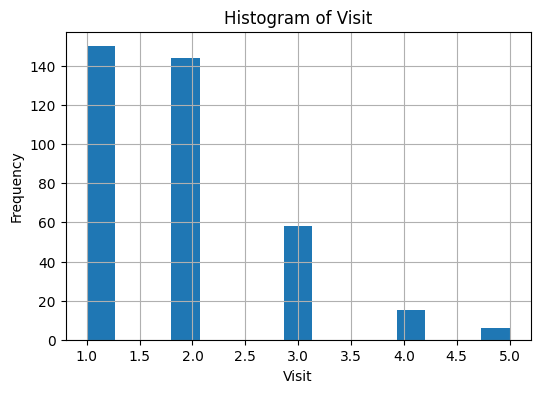

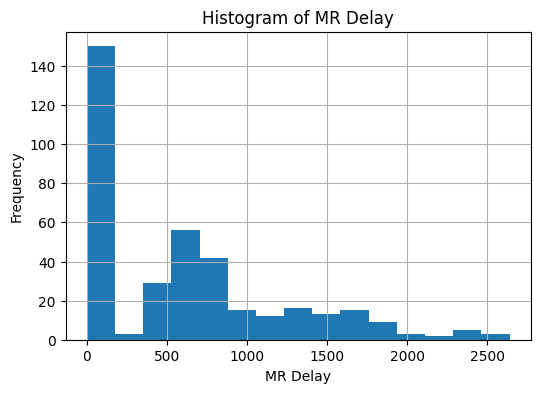

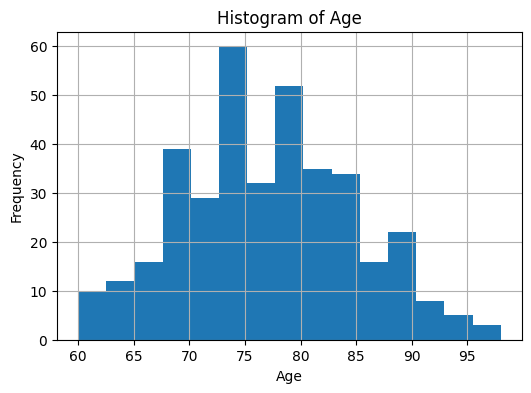

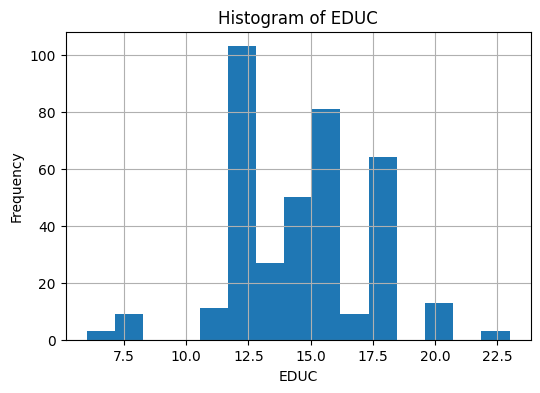

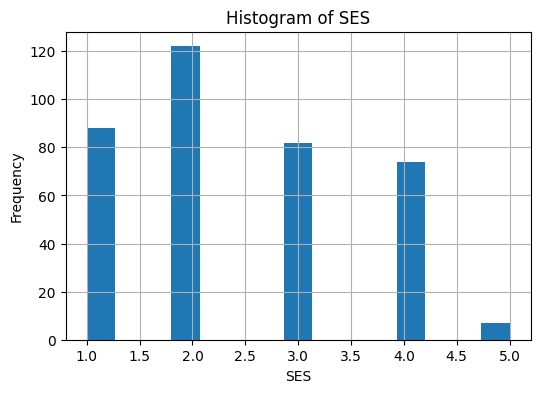

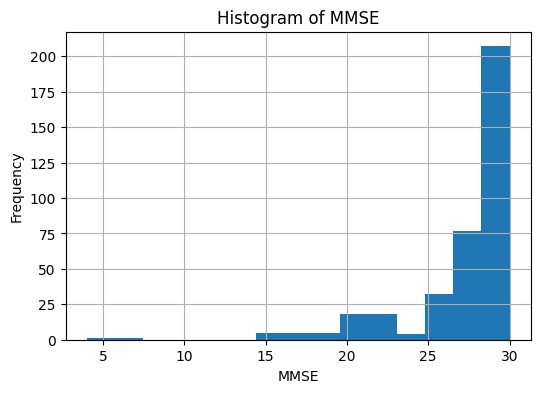

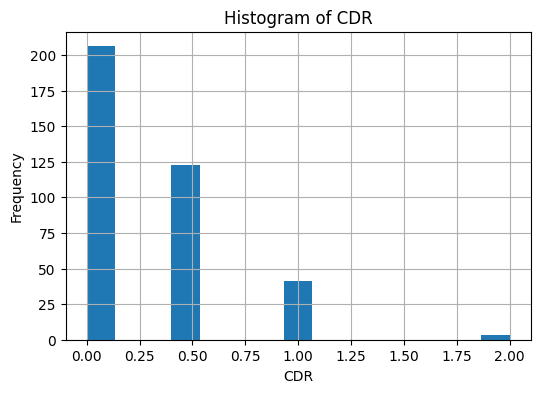

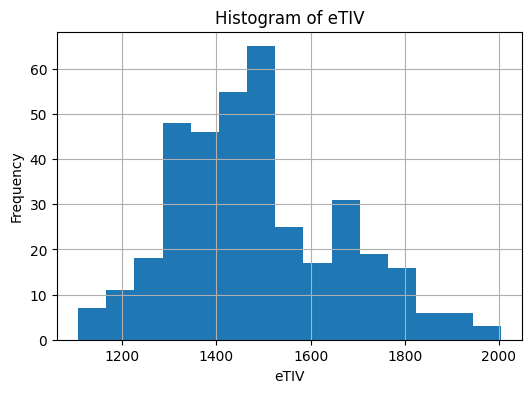

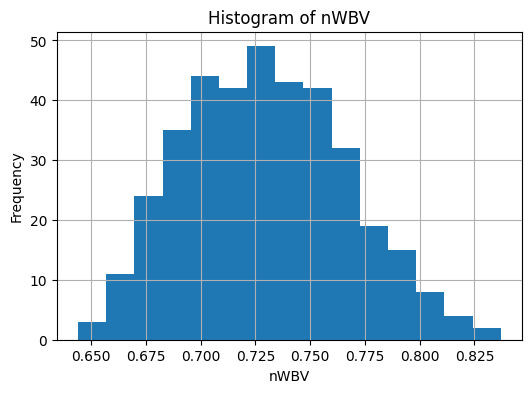

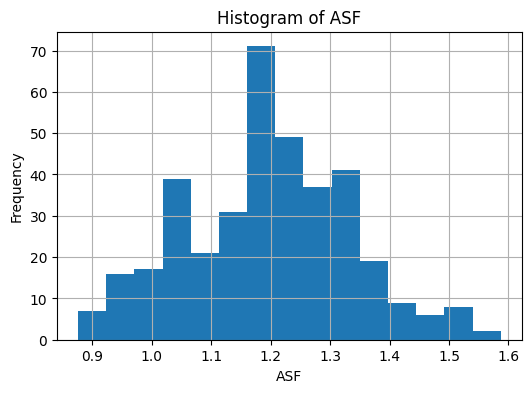

In [11]:
# Histograms for numerical features
num_cols = cleaned.select_dtypes(include=['number']).columns

# Creating a separate histogram for each numerical feature
for col in num_cols:
    plt.figure()  # This ensures a new figure is created for each histogram
    cleaned[col].hist(bins=15, figsize=(6, 4))
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


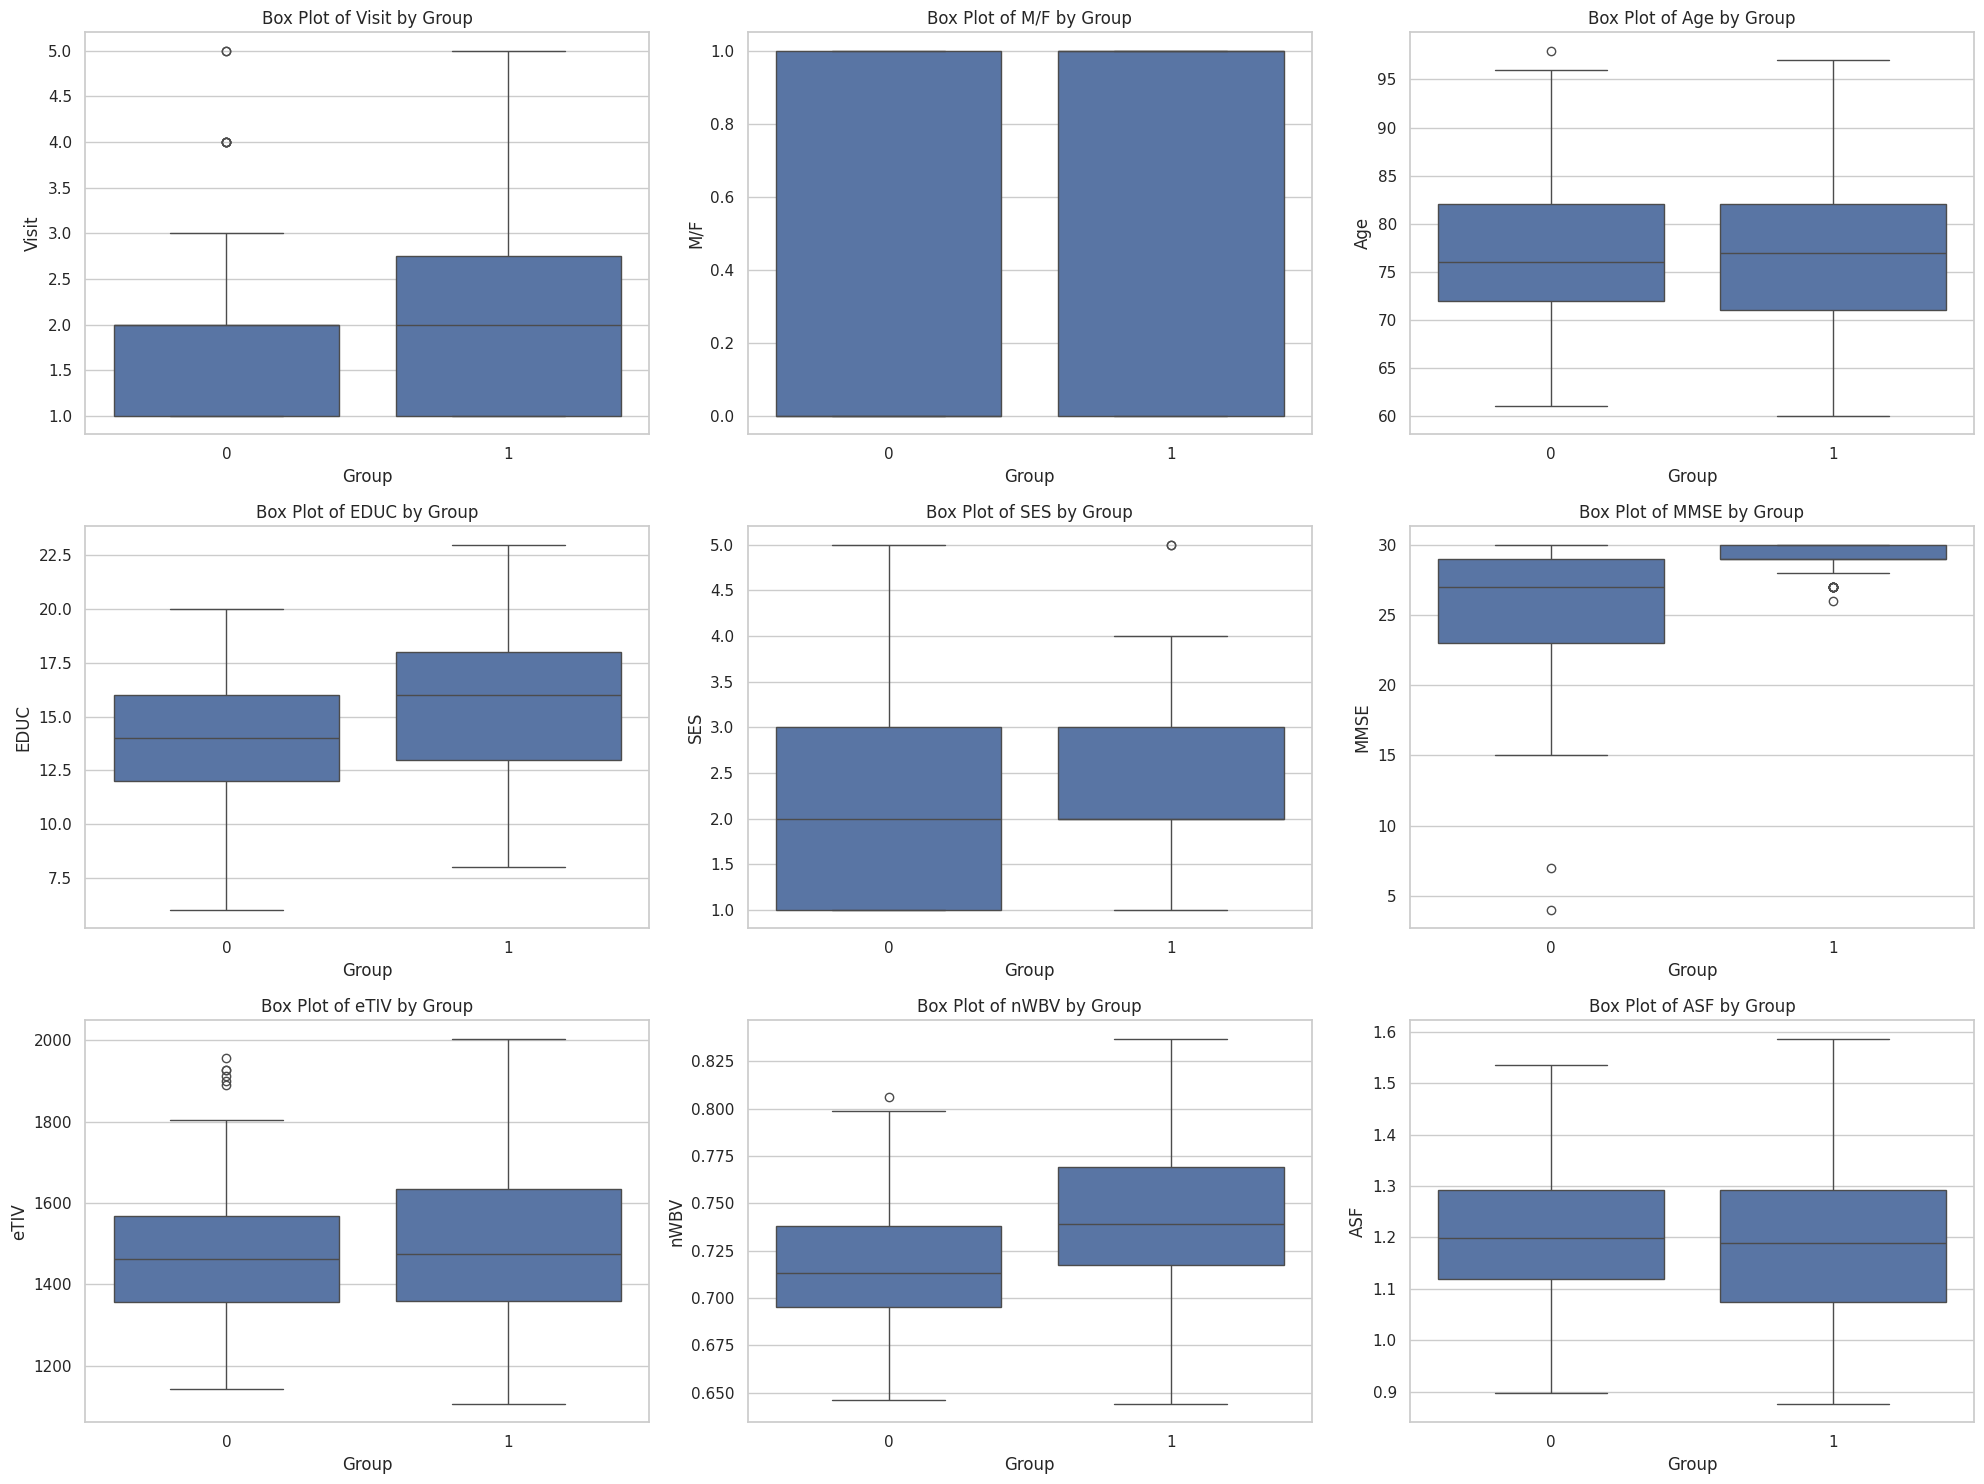

In [39]:
numerical_cols = cleaned.select_dtypes(include=['number']).columns
# Exclude 'Group' as it's not numerical
excluded_cols = ['MR Delay', 'CDR', 'Group']

# Filter out the excluded columns
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]

# Set up the figure for plotting
# Number of plots per row
num_cols_in_row = 3

# Calculate the number of rows needed
num_rows = -(-len(numerical_cols) // num_cols_in_row)
plt.figure(figsize=(20, num_rows * 5))

# Create a box plot for each numerical column
# Initialize subplot position
plot_position = 1
for col in numerical_cols:
    plt.subplot(num_rows, num_cols_in_row, plot_position)
    sns.boxplot(x='Group', y=col, data=cleaned)
    plt.title(f'Box Plot of {col} by Group')
    # Increment subplot position
    plot_position += 1

plt.tight_layout()
plt.show()


**Visit by Group**: The distribution for Group 0 has a median closer to 2, while Group 1 has a median that is slightly higher, suggesting Group 1 may have had more visits or a different kind of engagement with the healthcare process.

**MF by Group**: It seems to show a categorical variable (possibly Male/Female or another binary categorical variable) which does not vary by group, indicating similar distribution across both groups.

**Age by Group**: Group 0 has a wider age range with more variability and younger median age, while Group 1 has a higher median age with less variability, implying that Group 1 might consist of older individuals.

**EDUC by Group**: Education level (if EDUC stands for education) has a wider range and higher median for Group 0 compared to Group 1, suggesting that individuals in Group 0 may have higher education levels on average.

**SES by Group**: Socioeconomic status (if SES stands for that) shows a wider range for Group 0 but similar median values for both groups. Group 1 has an outlier indicating an individual with a very low SES.

**MMSE by Group**: The Mini-Mental State Examination (MMSE) scores are lower for Group 1, as indicated by the lower median and overall range, which could suggest greater cognitive impairment in this group.

**eTIV by Group**: Estimated Total Intracranial Volume (eTIV) shows a slightly higher median for Group 0 and more outliers in Group 1, indicating variability in brain size or health.

**nWBV by Group**: Normalized Whole Brain Volume (nWBV) is lower for Group 1, as seen by the lower median and quartiles, possibly suggesting more brain volume loss or atrophy in Group 1.

**ASF by Group**: The Atlas Scaling Factor (ASF) has a higher median for Group 1, which could correlate with brain atrophy or size differences compared to Group 0.